# 输入数据

In [2]:
import pandas as pd
d = pd.read_csv("2C4KPdNoise.csv")

# 训练集和测试集划分

In [3]:
# 训练集和测试集划分
from sklearn.cross_validation import train_test_split
n1 = d.shape[1]-1
X, y = d.iloc[:, 0:n1].values, d.iloc[:, n1].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
print ("X_train shape:",X_train.shape) 
print ("X_test  shape:",X_test.shape) 
print ("Y_train shape:",y_train.shape) 
print ("Y_test  shape:",y_test.shape) 

X_train shape: (1400, 18)
X_test  shape: (600, 18)
Y_train shape: (1400,)
Y_test  shape: (600,)


# 数据归一化

In [4]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# PCA analysis

In [5]:
# 对正则化后的训练数据进行PCA分析
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([  3.23491122e-01,   1.72876913e-01,   1.63413958e-01,
         9.77027735e-02,   7.44458752e-02,   6.72690880e-02,
         5.34500704e-02,   2.02180496e-02,   1.42407567e-02,
         7.21907475e-03,   4.52324867e-03,   9.20458997e-04,
         1.39682712e-04,   7.94216331e-05,   9.50547673e-06,
         1.96845974e-15,   4.30525509e-32,   8.78367860e-38])

<IPython.core.display.Javascript object>


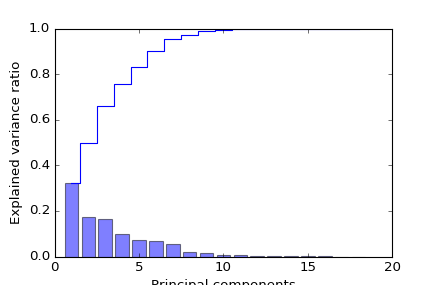

In [14]:
# 画出PCA解释方差累计图
%matplotlib notebook
plt.bar(range(1, 19), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 19), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [16]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [17]:
# 分类边界画图
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

使用前两个主成分，训练Logistic Regression分类器

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

<IPython.core.display.Javascript object>


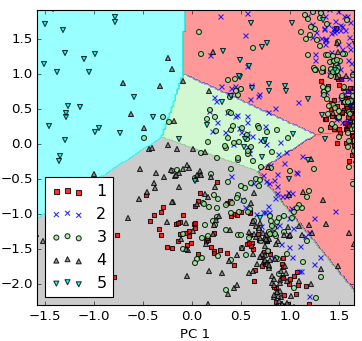

In [19]:
# 训练集的区域
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


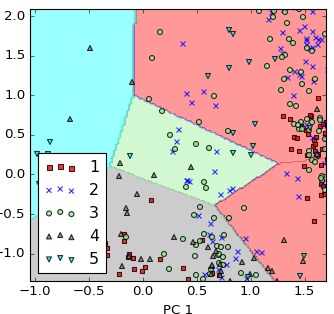

In [20]:
#测试集的区域
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

# LDA 分析

In [35]:
from sklearn.lda import LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

C:\Users\younggy\Anaconda\envs\python3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<IPython.core.display.Javascript object>


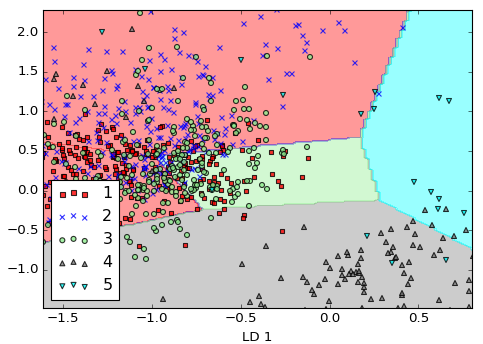

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/lda3.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


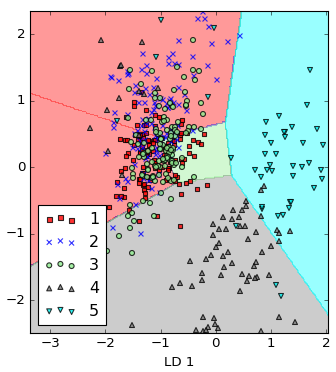

In [36]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/lda4.png', dpi=300)
plt.show()

# Kernel PCA